<a href="https://colab.research.google.com/github/lanyu0322/pedestrian_firstdraft_figures/blob/master/figure5_park_restaurant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from matplotlib import gridspec

# -- install geopandas
try:
  import geopandas as gp
except:
  !pip install geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# -- read in the parameters from 4 pop fit
fname = os.path.join("drive", "My Drive", "lwir", "data", "4_pop_fit", 
                     "4pop_para.csv")
parr = pd.read_csv(fname)

In [ ]:

wname = os.path.join("drive", "My Drive", "lwir", "data", "wunder", 
                     "wunder_knyc_conditions.feather")
wunder = pd.read_feather(wname)

In [ ]:
 # -- convert means and widths to hours                           
cname = ["m1", "m2", "m3", "sd1", "sd2", "sd3"]                                        
parr[cname] *= 0.25

In [ ]:
# -- sub-select Manhattan
bpath = os.path.join("drive", "My Drive", "lwir", "data", "boro_boundaries")
bname = "Borough Boundaries.geojson"
boros = gp.read_file(os.path.join(bpath, bname))
boros = boros[boros.boro_name == "Manhattan"]

# -- set the parks geometries file name
dpath = os.path.join("drive", "My Drive", "lwir", "data", "parks", "properties")
fname = "geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp"

# -- load the parks geometries and convert to NY State Plane
parks = gp.read_file(os.path.join(dpath, fname))
parks_m = parks[parks.borough == "M"]


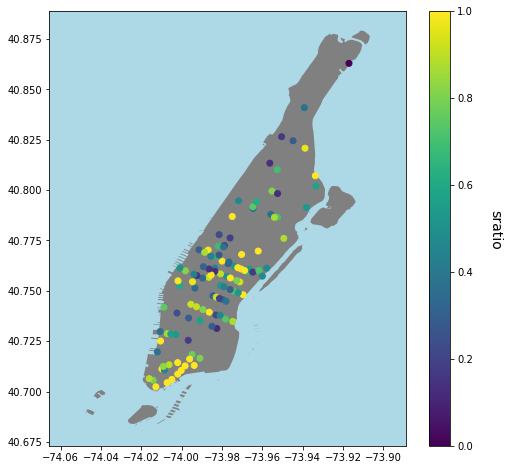

In [ ]:
# -- create a sratio plot of 4 population fit 
fig, ax = plt.subplots(figsize=[8, 8])
boros.plot(color="grey", ax=ax, legend=True)
#parks_m.plot(color="orange", ax=ax, legend=True)
sc = ax.scatter(parr["lon"], parr["lat"], 
                c= plt.cm.viridis(parr["sratio"]).clip(0, 2))
fig.colorbar(mappable=sc, ax=ax)
ax.set_facecolor("lightblue")
ax.axis("equal")
#ax.set_title("sratio of 4 population fit")

fig.text(0.9, 0.5, "sratio", ha="center", 
         va="center", rotation=-90, fontsize=14)

outfile = os.path.join("drive", "My Drive", "lwir", "output", "figure5",
                       "sratio of 4 population fit.png")
fig.savefig(outfile)

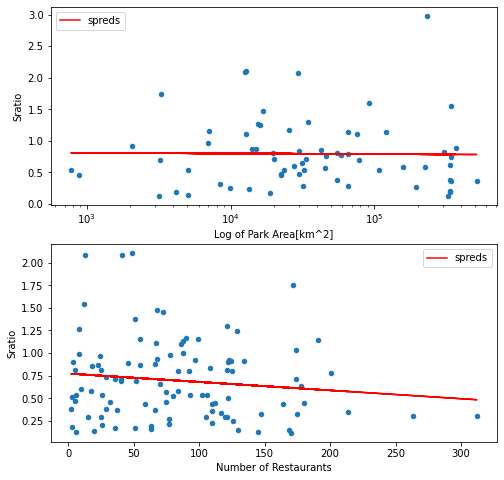

In [ ]:
# -- create a scatter plot of park area and sratio
sub_ps = parr[parr["parkarea"] > 0].copy()
sub_ps["sratio"] = sub_ps["sratio"] 
# sub_ps.plot.scatter("parkarea", "sratio", logx=True, figsize=[8, 8], vmax=2, s=50)


# -- create a linear prediction of parkarea and sratio
sub_ps["lparea"] = np.log10(sub_ps["parkarea"])
sub_ps["spreds"] = sm.ols("sratio ~ lparea", data=sub_ps).fit().predict(sub_ps)
# ax = sub_ps.plot.scatter("parkarea", "sratio", logx=True)
# sub_ps.plot("parkarea", "spreds", c = "r", ax=ax)

# -- create a linear prediction of rest and sratio plot
sub_rstrant = parr[parr["rstrant"] > 0].copy()
sub_rstrant["sratio"] = sub_rstrant["sratio"] 
sub_rstrant["spreds"] = sm.ols("sratio ~ rstrant", data=sub_rstrant).fit().predict(sub_rstrant)

# ax = sub_rstrant.plot.scatter("rstrant", "sratio")
# sub_rstrant.plot("rstrant", "spreds", c = "r", ax=ax)

fig = plt.figure(figsize=(8,8))
spec = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1, 1])

ax0 = fig.add_subplot(spec[0])
sub_ps.plot.scatter("parkarea", "sratio", logx=True, ax=ax0)
sub_ps.plot("parkarea", "spreds", c = "r", ax=ax0)
plt.xlabel("Log of Park Area[km^2]")
plt.ylabel("Sratio")
ax1 = fig.add_subplot(spec[1])
sub_rstrant.plot.scatter("rstrant", "sratio", ax=ax1)
sub_rstrant.plot("rstrant", "spreds", c = "r", ax=ax1)
plt.xlabel("Number of Restaurants")
plt.ylabel("Sratio")

plt.show()
outfile = os.path.join("drive", "My Drive", "lwir", "output", "figure5",
                       "sratio_park_restaurant.png")
fig.savefig(outfile)